# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

<p>What is in the data?</p>

In [9]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


Populating the interactive namespace from numpy and matplotlib


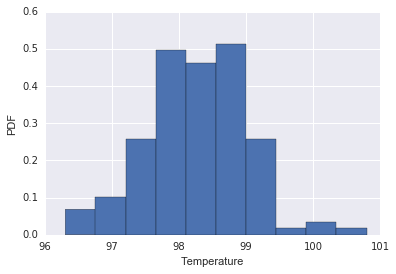

In [19]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

_= plt.hist(x='temperature',bins=10,normed='True',data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('PDF')
plt.show()

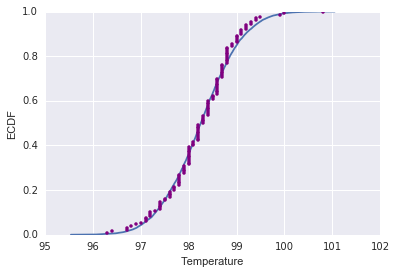

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / (1.0*n)

    return x, y

temp = df['temperature']

mu = np.mean(temp)
sigma = np.std(temp)

samples = np.random.normal(mu,sigma,10000)
x_theor,y_theor = ecdf(samples)
x,y = ecdf(temp)


_= plt.plot(x_theor,y_theor)
_= plt.plot(x, y, marker='.', linestyle='none',color='purple')
_= plt.xlabel('Temperature')
_= plt.ylabel('ECDF')
plt.show()




Based on the ECDF the data does look to be normally distributed

To solve for this mathematically, the Shapiro- Wilk test will be used.<a href=https://www.researchgate.net/publication/267205556_Power_Comparisons_of_Shapiro-Wilk_Kolmogorov-Smirnov_Lilliefors_and_Anderson-Darling_Tests> This test </a> has the best statistical power for testing normality


In [52]:
import scipy.stats as st
h_o = "The sample for temperature is normally distributed"
h_a = "The sample for temperature is NOT normally distributed"
#two tailed t test
shapiro = st.shapiro(temp)

if shapiro[1] < .05:
    print "Null Hypothesis Rejected: "+h_a
else:
    print "Null Hypothesis Accepted: "+h_o

Null Hypothesis Accepted: The sample for temperature is normally distributed


## Test for Independence

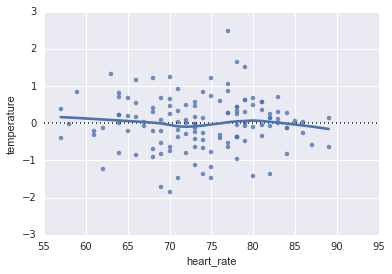

In [21]:
_= sns.residplot(df['heart_rate'],temp,lowess=True)

The residuals are randomly distributed as opposed to having a pattern which indicates the samples are independent of each other.

In [55]:
if len(df) > 30:
    print" The sample size is "+str(len(df))+" and is considered large enough for CLT to apply"

 The sample size is 130 and is considered large enough for CLT to apply


## Is the population mean really 98.6?

This can be answered via a two tailed z-test. 

The t- test is the correct method v/s the z-test given we don't have the population std deviation

HO: Null Hypothesis: Poplation mean for Human Temperature = 98.6

HA: Alternate Hypothesis: Population mean for Human Temperature != 98.6


In [8]:
import scipy.stats as st

h_o = "Poplation mean for Human Temperature = 98.6"
h_a = "Population mean for Human Temperature != 98.6"
#two tailed t test
t_test = st.ttest_1samp(temp,98.6)

if t_test[1] < .05:
    print "Null Hypothesis Rejected: "+h_a
else:
    print "Null Hypothesis Accepted: "+h_o

Null Hypothesis Rejected: Population mean for Human Temperature != 98.6


Executing z test assuming sample std dev = population std dev

In [9]:
# z statistic
z_test= (mu-98.6)/(sigma/np.sqrt(len(df)))
z_critical_upper = st.norm.ppf(.975)
z_critical_lower = st.norm.ppf(.025)

if z_test >= z_critical_upper or z_test < z_critical_lower:
    print "Null Hypothesis Rejected: "+h_a
else:
    print "Null Hypothesis Accepted: "+h_o

Null Hypothesis Rejected: Population mean for Human Temperature != 98.6


The results for both tests are the same (although the t-test is the correct way). The null hypothesis is rejected.

## Confidence Intervals

Confidence intervals will be derived both using hacker statistics and following the math forumulas. These are described below

In [10]:
# Hacker Statistics

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

bs_replicates = draw_bs_reps(temp,np.mean,10000)

conf_int = np.percentile(bs_replicates,[2.5,97.5])

print'95% confidence interval =',conf_int, 'Farenheit'

95% confidence interval = [ 98.12536538  98.37461538] Farenheit


In [11]:
t_critical_upper = st.t.ppf(.975,len(df)-1)
t_critical_lower = st.t.ppf(.025,len(df)-1)

se = sigma/np.sqrt(len(df))
conf_int_2 = [mu+t_critical_lower*se,mu+t_critical_upper*se]

print'95% confidence interval =',conf_int_2, 'Farenheit'

95% confidence interval = [98.12249318821641, 98.375968350245145] Farenheit


Both the "Hacker Statistics" and the "Math" way lead to the same answer

In [47]:
t_critical_upper = st.t.ppf(.9995,len(df)-1)
t_critical_lower = st.t.ppf(.0005,len(df)-1)

se = sigma/np.sqrt(len(df))
conf_int_2 = [mu+t_critical_lower*se,mu+t_critical_upper*se]

print'99.9% confidence interval =',conf_int_2, 'Farenheit'


99.9% confidence interval = [98.033517143547087, 98.464944394914468] Farenheit


Any temperature below 98.03 or above 98.46 can be considered 'abnormal'

## Comparing Male and Female Data

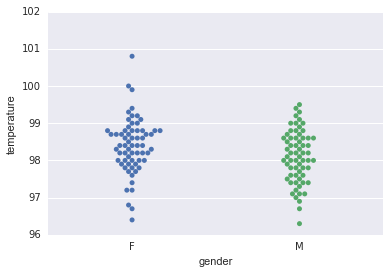

In [22]:
_=sns.swarmplot(x='gender',y='temperature',data=df)

Looks like females have a bit more of concentrated distribution as opposed to males and that males may have a lower mean temperature

A two sample t-test will reveal if the differences are significant

In [34]:
females=df['temperature'][df['gender']=='F']
males=df['temperature'][df['gender']=='M']

print 'Average Male Body Temperature: '+str(np.mean(males))
print 'Average Female Body Temperature:'+str(np.mean(females))

st.ttest_ind(males,females)

h_o = "Average Male Body Temperature=Average Female Body Temperature"
h_a = "Average Male Body Temperature!=Average Female Body Temperature"
#two tailed t test
t_test = st.ttest_1samp(temp,98.6)

if t_test[1] < .05:
    print "Null Hypothesis Rejected: "+h_a
else:
    print "Null Hypothesis Accepted: "+h_o

Average Male Body Temperature: 98.1046153846
Average Female Body Temperature:98.3938461538
Null Hypothesis Rejected: Average Male Body Temperature!=Average Female Body Temperature


## Conclusion
Human body temperatures are normally distributed. 

However the population mean is between 98.12 and 98.38 with 95% confidence as opposed to 98.6.

Any temperature below 98.03 or above 98.46 can be considered 'abnormal' with a 99.9% CI

Male and Female body temperatures have a different mean with female mean body temerature is typically higher.